In [1]:
import sys
sys.path.append('../src')

from module.linear import Linear
from loss.mse_loss import MSELoss
from networks.linear_regression import LinearRegression

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy.random as rd

In [3]:
# def plot_frontiere(data, f, step=20):
#     grid, x, y = make_grid(data=data, step=step)
#     plt.contourf(x, y, f(grid).reshape(x.shape),
#                  colors=('gray', 'blue'), levels=[-1, 0, 1])


# def make_grid(data=None, xmin=-5, xmax=5, ymin=-5, ymax=5, step=20):
#     if data is not None:
#         xmax, xmin, ymax, ymin = np.max(data[:, 0]),  np.min(
#             data[:, 0]), np.max(data[:, 1]), np.min(data[:, 1])
        
#     x, y = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)*1./step),
#                        np.arange(ymin, ymax, (ymax-ymin)*1./step))
    
#     grid = np.c_[x.ravel(), y.ravel()]
#     return grid, x, y

In [4]:
def mainLineaire(a=10, sigma=2, niter=1000):
    # On décide arbitrairement d'un coefficient directeur a
    print('\nCoefficient directeur réel:', a)
    
    # Génération des données d'entraînement
    xtrain = np.array( [ x for x in np.linspace(0, 2.0, 100) ] ).reshape(-1,1)
    ytrain = np.array( [ a * x + rd.uniform(-sigma,sigma) for x in np.linspace(0,2.0,100) ] )
    
    # Création de notre modèle de régression linéaire
    rl = LinearRegression(niter=niter)
    
    # Phase d'entraînement puis prédiction des classes des données de xtrain
    rl.fit(xtrain, ytrain.reshape(-1,1))
    
    w = rl.linear._parameters[0][0]
    print('Coefficient linéaire prédit:', w)
    
    last_loss = rl.train_loss[-1]
    
    # Affichage de la loss
    print("\nErreur mse :", last_loss )

        
    # Affichage des données et de la droite prédite
    toPlot = [ w * x[0] for x in xtrain ]
    plt.figure()
    plt.title('Régression linéaire, a = {}, â = {}, erreur = {}'.format(a, round(rl.linear._parameters[0][0], 2), round(last_loss, 1)))
    plt.scatter(xtrain.reshape(1,-1), ytrain, s = 1, c = 'midnightblue', label='data')
    plt.plot(xtrain.reshape(1,-1)[0], toPlot, color = 'mediumslateblue', label='model')
    plt.legend()

    plt.figure()
    plt.title('Evolution de la loss')
    plt.plot(rl.train_loss, label='loss', c='darkseagreen')
    plt.legend()
    plt.xlabel('Nombre d\'itérations')


Coefficient directeur réel: 10
Coefficient linéaire prédit: 10.37737420516851

Erreur mse : 1.268986256654184


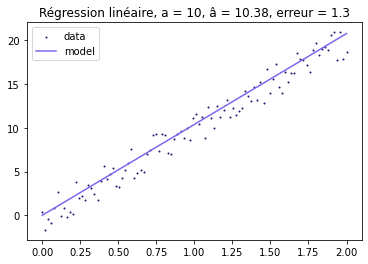

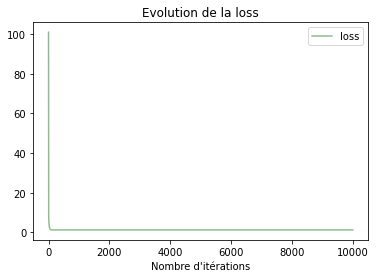

In [7]:
mainLineaire(niter=10000)

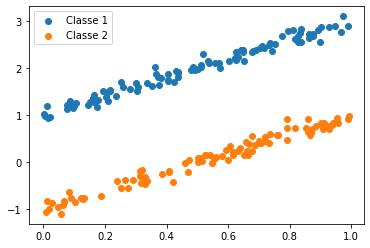

In [9]:
num_samples = 100
# pour la première classe de points, on prend des coordonnées x aléatoires entre 0 et 1 et y = m*x + c
m = 2
c = 1
x1 = np.random.rand(num_samples)
y1 = m * x1 + c + np.random.randn(num_samples) * 0.1
# pour la deuxième classe de points, on prend des coordonnées x aléatoires entre 0 et 1 et y = m*x + c2
c2 = -1
x2 = np.random.rand(num_samples)
y2 = m * x2 + c2 + np.random.randn(num_samples) * 0.1

# Afficher les nuages de points
plt.scatter(x1, y1, label='Classe 1')
plt.scatter(x2, y2, label='Classe 2')
plt.legend()
plt.show()

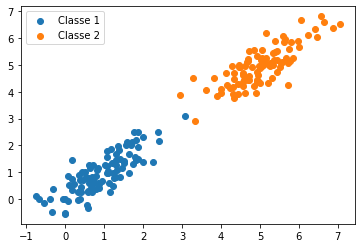

In [10]:
mu1 = np.array([1, 1])
mu2 = np.array([5, 5])
sigma = np.array([[0.5, 0.4], [0.4, 0.5]])

# Générer des données gaussiennes linéairement séparables
num_samples = 100
x1, y1 = np.random.multivariate_normal(mu1, sigma, num_samples).T
x2, y2 = np.random.multivariate_normal(mu2, sigma, num_samples).T

# Afficher les nuages de points
plt.scatter(x1, y1, label='Classe 1')
plt.scatter(x2, y2, label='Classe 2')
plt.legend()
plt.show()

In [11]:
def gen_arti(centerx=1,centery=1,sigma=0.1,nbex=1000,data_type=0,epsilon=0.02):
    """ Generateur de donnees,
        :param centerx: centre des gaussiennes
        :param centery:
        :param sigma: des gaussiennes
        :param nbex: nombre d'exemples
        :param data_type: 0: melange 2 gaussiennes, 1: melange 4 gaussiennes, 2:echequier
        :param epsilon: bruit dans les donnees
        :return: data matrice 2d des donnnes,y etiquette des donnnees
    """
    if data_type==0:
         #melange de 2 gaussiennes
         xpos=np.random.multivariate_normal([centerx,centerx],np.diag([sigma,sigma]),nbex//2)
         xneg=np.random.multivariate_normal([-centerx,-centerx],np.diag([sigma,sigma]),nbex//2)
         data=np.vstack((xpos,xneg))
         y=np.hstack((np.ones(nbex//2),-np.ones(nbex//2)))
    if data_type==1:
        #melange de 4 gaussiennes
        xpos=np.vstack((np.random.multivariate_normal([centerx,centerx],np.diag([sigma,sigma]),nbex//4),np.random.multivariate_normal([-centerx,-centerx],np.diag([sigma,sigma]),nbex//4)))
        xneg=np.vstack((np.random.multivariate_normal([-centerx,centerx],np.diag([sigma,sigma]),nbex//4),np.random.multivariate_normal([centerx,-centerx],np.diag([sigma,sigma]),nbex//4)))
        data=np.vstack((xpos,xneg))
        y=np.hstack((np.ones(nbex//2),-np.ones(nbex//2)))

    if data_type==2:
        #echiquier
        data=np.reshape(np.random.uniform(-4,4,2*nbex),(nbex,2))
        y=np.ceil(data[:,0])+np.ceil(data[:,1])
        y=2*(y % 2)-1
    # un peu de bruit
    data[:,0]+=np.random.normal(0,epsilon,nbex)
    data[:,1]+=np.random.normal(0,epsilon,nbex)
    # on mélange les données
    idx = np.random.permutation((range(y.size)))
    data=data[idx,:]
    y=y[idx]
    return data,y.reshape(-1, 1)

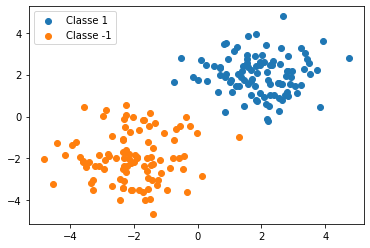

In [12]:
num_samples = 100
x1 = np.random.randn(num_samples, 2) + np.array([2, 2])
x2 = np.random.randn(num_samples, 2) + np.array([-2, -2])
X = np.vstack((x1, x2))
Y = np.hstack((np.ones(num_samples), -np.ones(num_samples)))

# Afficher les nuages de points
plt.scatter(x1[:, 0], x1[:, 1], label='Classe 1')
plt.scatter(x2[:, 0], x2[:, 1], label='Classe -1')
plt.legend()
plt.show()


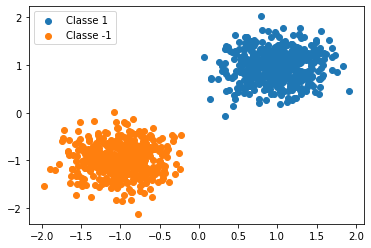

In [13]:
X, y = gen_arti(data_type=0)
y = y.reshape(-1)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Classe 1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], label='Classe -1')
plt.legend()
plt.show()